# creating own array
1. initialize array
2. fill array
3. vizualize array 2-dimensional

In [1]:
# array bauen
import numpy as np

y=np.array([0, 1, 2, 3])
print(y)

#entsprechend den ersten 4 embeddings des unten eingelesenen textes: 'human', 'in', 'interface', 'is' 
X_2d = np.array([[-44.354923, -95.2978], 
                 [-174.67386, 87.660484], 
                 [178.83932, -4.4730515], 
                 [100.901505, -150.73198]])

print(X_2d)

[0 1 2 3]
[[ -44.354923   -95.2978   ]
 [-174.67386     87.660484 ]
 [ 178.83932     -4.4730515]
 [ 100.901505  -150.73198  ]]


In [2]:
from matplotlib import pyplot as plt
#from sklearn.manifold import TSNE
from sklearn import datasets
digits = datasets.load_digits()

#2-dimensionales tsne model erstellen
#tsne = TSNE(n_components=2, random_state=0)

#vizualize as a scatterplott
target_ids = range(len(digits.target_names))
plt.figure(figsize=(16, 16))
colors = 'r', 'g', 'b', 'c'
for i, c, label in zip(target_ids, colors, digits.target_names):
    plt.scatter(X_2d[y == i, 0], X_2d[y == i, 1], c=c, label=label)
plt.legend()
plt.show()

<Figure size 1600x1600 with 1 Axes>

---
## create your own embeddings and vizualize it in s-dim

1. initialize model with own tiny dataset
2. vizualize model as scatterplott

In [3]:
from gensim.models import Word2Vec

In [6]:
# dataset
tokenized_text = [['human', 'in', 'interface', 'is', 'kind', 'of', 'a', 'computer', 'survey'],['the', 'user', 'as', 'system', 'in' 'response', 'on', 'time', 'and', 'trees', 'and', 'graph', 'as', 'minors']]

#or read in text from file
#f=open('./data/loaded-language.txt','r',errors = 'ignore')
#raw=f.read()
#raw = raw.lower()# converts to lowercase

In [5]:
#tokenization
#import nltk
#nltk.download('punkt')

##from nltk.tokenize import word_tokenize
##tokenized_text=word_tokenize(raw)

NameError: name 'raw' is not defined

In [ ]:
# print stopwords
##from nltk.corpus import stopwords
##print(stopwords.words('english'))

In [ ]:
#extract stopwords
'''
filtered_sentence = []
stop_words = set(stopwords.words('english'))
for w in tokenized_text:
    if w not in stop_words:
        filtered_sentence.append(w)
  
#print(word_tokens)
print(filtered_sentence[0:20])
'''

In [7]:
print(tokenized_text[0:10])

[['human', 'in', 'interface', 'is', 'kind', 'of', 'a', 'computer', 'survey'], ['the', 'user', 'as', 'system', 'inresponse', 'on', 'time', 'and', 'trees', 'and', 'graph', 'as', 'minors']]


In [9]:
# text speziell für word2vec-modell vorbereiten
##texts = [[text for text in doc.split()] for doc in tokenized_text]
##print(texts[0:10])

In [11]:
# model initialize / train
model = Word2Vec(tokenized_text, min_count=1, size=100) # 100 is default
#model = Word2Vec(texts, min_count=1, size=100) # 100 is default

In [12]:
# print a summary of the model << NACHSEHEN GENAU!!!!
##vocab = anzahl der wörter
##size = layergröße (wieviele vektoren pro wort)
##alpha = vector of error gradients multiplied by the learning rate
print(model)

Word2Vec(vocab=20, size=100, alpha=0.025)


In [13]:
# create list from vocab list 
words = model.wv.vocab.keys()
#print(words)

In [14]:
# print numpy vektor (100) from word 'as' 
model.wv['as']

array([ 2.3197703e-04, -3.4842470e-03,  4.3548723e-03, -9.1740867e-04,
        1.5919828e-03,  1.1957303e-03,  2.9863082e-04,  3.1398045e-04,
        5.5721775e-05,  1.0373498e-03,  1.7808521e-03,  7.9464912e-04,
        3.8420516e-03,  2.5397514e-05, -1.4718834e-03,  1.8323233e-03,
       -8.4734456e-05,  4.0097325e-04,  1.1840438e-03, -3.5856792e-04,
        3.5010057e-04,  4.8847385e-03, -3.2534476e-04,  3.2471828e-03,
       -1.8814696e-03, -2.3182812e-03,  5.9616729e-04,  4.0773680e-03,
       -3.6658025e-03,  3.5856543e-03,  2.0142072e-03,  4.8610824e-03,
        3.0670881e-03, -4.7285571e-03, -3.4027721e-03,  2.3180221e-03,
        1.6012040e-03,  1.8371091e-03, -3.6559976e-03,  4.2298858e-04,
       -2.8664262e-03, -3.6640832e-04,  3.4830240e-03,  4.4149389e-03,
       -2.3793825e-03,  3.6273149e-03,  1.9921314e-03,  2.5132778e-03,
       -3.9569990e-04,  3.2784364e-03,  4.3480317e-04,  1.0099513e-03,
       -3.2438471e-03,  3.6473388e-03, -3.8442044e-03, -1.0294286e-03,
      

'\n#create PCA Plptt\nfrom sklearn.decomposition import PCA\nfrom matplotlib import pyplot\n\nX = model.wv[model.wv.vocab]\npca = PCA(n_components=2)\nresult = pca.fit_transform(X)\n# create a scatter plot of the projection\npyplot.scatter(result[:, 0], result[:, 1])\nwords = list(model.wv.vocab)\nfor i, word in enumerate(words):\n\tpyplot.annotate(word, xy=(result[i, 0], result[i, 1]))\ndisplay(pyplot.show())'

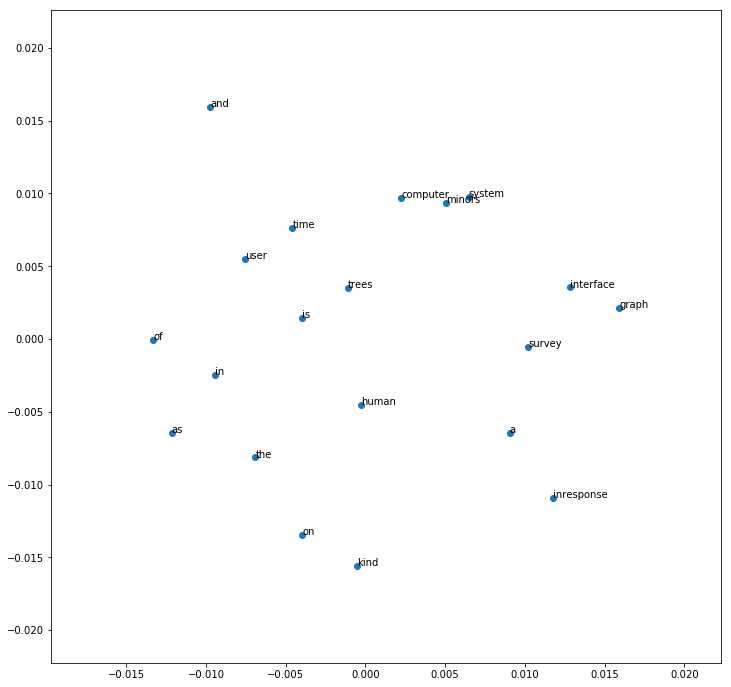

In [16]:
from sklearn.decomposition import PCA
from matplotlib import pyplot

X = model.wv[model.wv.vocab]
# windowsize
fig= pyplot.figure(figsize=(12,12))
pca = PCA(n_components=2)
result = pca.fit_transform(X)
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
	pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
#display(pyplot.show())
'''
#create PCA Plptt
from sklearn.decomposition import PCA
from matplotlib import pyplot

X = model.wv[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
	pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
display(pyplot.show())'''

# fooling around with analogy- und similarity tasks...
* examples: https://tedboy.github.io/nlps/generated/generated/gensim.models.Word2Vec.html 
* more examples...: https://x.st/fooling-around-with-word-embeddings/


![](./data/wkm.png)

In [20]:
#Find the top-N most similar words
word2vec_result2 = model.most_similar('human', topn=5)
print("most nearest to human = ", word2vec_result2, "\n")

most nearest to human =  [('in', 0.20653988420963287), ('trees', 0.1463388055562973), ('graph', 0.12232445925474167), ('minors', 0.09307461977005005), ('survey', 0.09191098064184189)] 



<ipython-input-20-69cc50575927>:2: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  word2vec_result2 = model.most_similar('human', topn=5)


In [18]:
# A to B is X to Y
# hierzu siehe auch CBOW und skip-gram
## Bedeutungen errechnen
## calculate: KÖNIG - MANN + FRAU = KÖNIGIN
word2vec_result1 = model.most_similar(positive=['human', 'computer'], negative=['user'], topn=10)
# topn = wieviele ouputs sollen vorgeschlagen werden?
print("human - user + computer = ", word2vec_result1, "\n")

human - user + computer =  [('a', 0.1317022442817688), ('survey', 0.08042550086975098), ('graph', 0.07071553170681), ('system', 0.050016917288303375), ('inresponse', 0.04626525938510895), ('kind', 0.04362256079912186), ('trees', 0.03173617273569107), ('and', 0.008522436022758484), ('on', 0.007028833031654358), ('in', 0.005335833877325058)] 



<ipython-input-18-0fd8bfd212d7>:5: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  word2vec_result1 = model.most_similar(positive=['human', 'computer'], negative=['user'], topn=10)


In [19]:
# Which word from the given list doesn’t go with the others?
print(model.wv.doesnt_match("human survey system and minors".split()))

system


/home/whoami/anaconda3/lib/python3.8/site-packages/gensim/models/keyedvectors.py:876: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


In [24]:
# A to B is X to Y
# hierzu siehe auch CBOW und skip-gram
## Bedeutungen errechnen
## calculate: KÖNIG - MANN + FRAU = KÖNIGIN
word2vec_result1 = model.most_similar(positive=['human', 'computer'], negative=['user'], topn=10)
# topn = wieviele ouputs sollen vorgeschlagen werden?
print("human - user + computer = ", word2vec_result1, "\n")

human - user + computer =  [('a', 0.1317022442817688), ('survey', 0.08042550086975098), ('graph', 0.07071553170681), ('system', 0.050016917288303375), ('inresponse', 0.04626525938510895), ('kind', 0.04362256079912186), ('trees', 0.03173617273569107), ('and', 0.008522436022758484), ('on', 0.007028833031654358), ('in', 0.005335833877325058)] 



<ipython-input-24-0fd8bfd212d7>:5: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  word2vec_result1 = model.most_similar(positive=['human', 'computer'], negative=['user'], topn=10)


PCA(n_components=2)

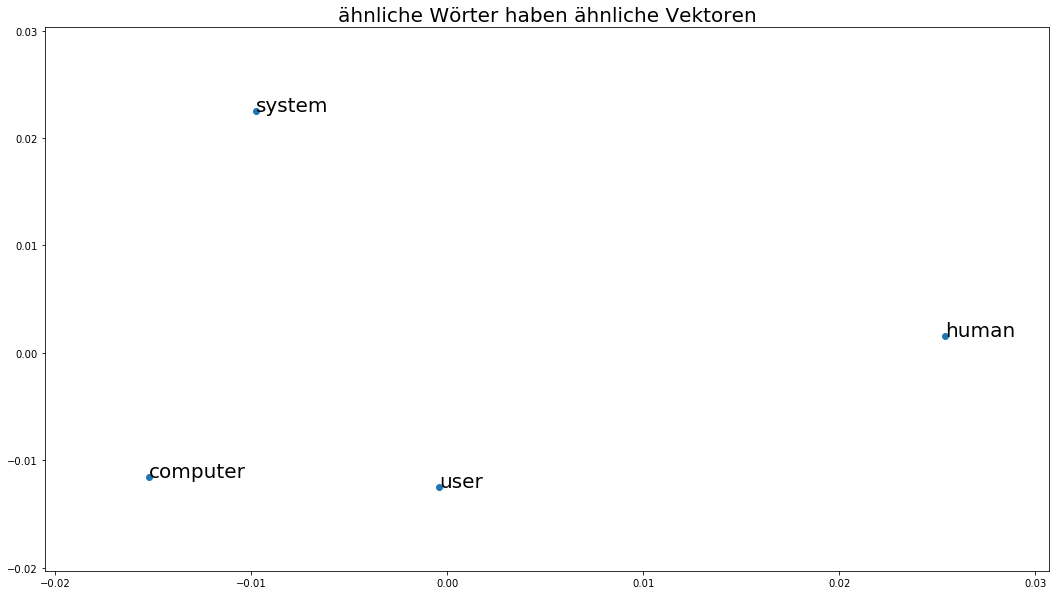

In [27]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

%matplotlib inline
plt.rcParams["figure.figsize"] = (18, 10)

def plot_words(*words, lines=False):
    pca = PCA(n_components=2)
    xys = pca.fit_transform([model.wv[w] for w in words])

    if lines:
        for i in range(0, len(words), 2):
            plt.plot(xys[i:i+2, 0], xys[i:i+2, 1])
    else:
        plt.scatter(*xys.T)

    for word, xy in zip(words, xys):
        plt.annotate(word, xy, fontsize=20)

    return pca

plt.title('ähnliche Wörter haben ähnliche Vektoren', fontsize=20)

plot_words('human', 'user', 'system', 'computer')

In [28]:
#Using Pretrained Embeddings
#Download glove embeddings. Downloading and accessing this might take up to several minutes.

import gensim.downloader as api

glove_model = api.load('glove-wiki-gigaword-50')
print('model loaded')

model loaded


In [29]:
# calculate: (king - man) + woman = ?
glove_result = glove_model.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)
print(glove_result)

[('queen', 0.8523603677749634)]


In [30]:
# calculate: (black - money) + gun = ?
glove_result = glove_model.most_similar(positive=['gun', 'black'], negative=['money'], topn=1)
print(glove_result)

[('wearing', 0.7007260918617249)]


In [31]:
glove_result = glove_model.most_similar(positive=['man', 'nurse'], negative=['woman'], topn=1)
print(glove_result)

[('doctor', 0.8087942600250244)]


In [32]:
# calculate N most similar words to 
glove_model.most_similar(positive=['muslim'], topn=30)

[('muslims', 0.9169793128967285),
 ('moslem', 0.9101653695106506),
 ('islamic', 0.8865490555763245),
 ('shiite', 0.8608403205871582),
 ('sunni', 0.8565249443054199),
 ('christians', 0.8442628383636475),
 ('religious', 0.8278148174285889),
 ('arab', 0.821909487247467),
 ('fundamentalist', 0.8166921734809875),
 ('clerics', 0.8147090077400208),
 ('shiites', 0.8115920424461365),
 ('moslems', 0.8096585273742676),
 ('kurdish', 0.8091631531715393),
 ('islam', 0.8036206960678101),
 ('fundamentalists', 0.8004118800163269),
 ('militant', 0.7967327833175659),
 ('arabs', 0.7741754055023193),
 ('protestant', 0.7729413509368896),
 ('extremists', 0.772925615310669),
 ('ethnic', 0.7613723278045654),
 ('tribal', 0.760925829410553),
 ('kashmiri', 0.7570258975028992),
 ('hindus', 0.7557337284088135),
 ('secular', 0.7544103264808655),
 ('orthodox', 0.7525961995124817),
 ('kurds', 0.7521689534187317),
 ('predominantly', 0.751596987247467),
 ('followers', 0.7512257099151611),
 ('shia', 0.7473584413528442),
